In [293]:
import pandas as pd

df = pd.read_csv(r"C:\Users\andre\OneDrive - Universidad Complutense de Madrid (UCM)\Escritorio\UNIVERSIDAD\2º\2º Cuatrimestre\PD1\fighters_final_limpio.csv")

df

,unnamed:_0,name,striking_accuracy(%),efectividad_de_derribo_(%),sig_str_landed,sig_str_attempted,takedowns_landed,takedowns_attempted,sig_str_landed_per_min,sig_str_absorbed_per_min,...,height,weight,octagon_debut,reach,leg_reach,division,imagen,Wins,Losses,Draws
0,0,JUAN ADAMS,0.56,0.56,234.0,420.0,2.00,3.0,7.09,4.06,...,77.0,266.0,"DEC. 15, 2018",80.0,42.5,Heavyweight Division,https://dmxg5wxfqgb4u.cloudfront.net/styles/at...,5,3,0
1,1,ANTHONY ADAMS,0.42,0.42,95.0,227.0,2.94,7.0,3.17,5.93,...,73.0,184.5,"FEB. 19, 2025",76.5,43.0,Middleweight Division,https://dmxg5wxfqgb4u.cloudfront.net/styles/at...,8,2,0
2,2,ZARRUKH ADASHEV,0.40,0.40,115.0,285.0,2.00,5.0,3.65,3.04,...,65.0,125.5,"JUN. 13, 2020",65.0,35.0,Flyweight Division,https://dmxg5wxfqgb4u.cloudfront.net/styles/at...,4,4,0
3,3,ISRAEL ADESANYA,0.48,0.48,1271.0,2639.0,4.32,9.0,4.02,3.20,...,76.0,185.0,"FEB. 11, 2018",80.0,44.5,Middleweight Division,https://dmxg5wxfqgb4u.cloudfront.net/styles/at...,24,5,0
4,4,NICK AGALLAR,0.12,0.12,5.0,43.0,0.24,2.0,0.69,4.56,...,67.0,155.0,"NOV. 21, 2003",NaN,NaN,Lightweight Division,NaN,12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,2769,ZHALGAS ZHUMAGULOV,0.43,0.43,425.0,987.0,3.00,36.0,5.24,5.86,...,64.0,125.5,"JUL. 11, 2020",66.5,36.0,Flyweight Division,https://dmxg5wxfqgb4u.cloudfront.net/styles/at...,14,9,0
2770,2770,FARÈS ZIAM,0.52,0.52,342.0,661.0,16.64,32.0,2.85,1.62,...,73.0,156.0,"SEP. 7, 2019",75.0,42.0,Lightweight Division,https://dmxg5wxfqgb4u.cloudfront.net/styles/at...,17,4,0
2771,2771,JAMES ZIKIC,0.44,0.44,29.0,66.0,0.44,1.0,1.93,3.20,...,74.0,202.0,"JUL. 13, 2002",NaN,NaN,Light Heavyweight Division,NaN,16,3,0
2772,2772,CAT ZINGANO,0.61,0.61,181.0,295.0,13.00,20.0,2.57,1.63,...,66.0,144.0,"APR. 14, 2013",68.0,38.0,Women's Featherweight Division,https://dmxg5wxfqgb4u.cloudfront.net/styles/at...,10,4,0


# Análisis de los datos

In [294]:
df.shape

(2774, 45)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   unnamed:_0                    2774 non-null   int64  
 1   name                          2774 non-null   object 
 2   striking_accuracy(%)          2687 non-null   float64
 3   efectividad_de_derribo_(%)    2391 non-null   float64
 4   sig_str_landed                2687 non-null   float64
 5   sig_str_attempted             2687 non-null   float64
 6   takedowns_landed              2391 non-null   float64
 7   takedowns_attempted           2391 non-null   float64
 8   sig_str_landed_per_min        2695 non-null   float64
 9   sig_str_absorbed_per_min      2695 non-null   float64
 10  knockdown_per_15min(avg)      2695 non-null   float64
 11  promedio_de_sumisión_por_15m  2695 non-null   float64
 12  sig_str_defense(%)            2682 non-null   float64
 13  tak

In [296]:
df.isnull().sum()

unnamed:_0                         0
name                               0
striking_accuracy(%)              87
efectividad_de_derribo_(%)       383
sig_str_landed                    87
sig_str_attempted                 87
takedowns_landed                 383
takedowns_attempted              383
sig_str_landed_per_min            79
sig_str_absorbed_per_min          79
knockdown_per_15min(avg)          79
promedio_de_sumisión_por_15m      79
sig_str_defense(%)                92
takedown_defense(%)              523
time_fight(avg)                    0
sig_str_standing                   0
sig_str_standing(%)                0
sig_str_clinch                     0
sig_str_clinch(%)                  0
sig_str_ground                     0
porcentaje_suelo                   0
sig_str_to_head                    0
sig_str_to_head(%)                 0
sig_str_to_legs                    0
sig_str_to_legs(%)                 0
wins_by_ko/tko                     0
wins_by_ko/tko(%)                  0
w

In [297]:
df.shape

(2774, 45)

# Limpieza de los datos

In [298]:
#Eliminamos alos peleadores con menos de tres peleas, ya que sus datos no son fiables
df_p = pd.read_csv(r"C:\Users\andre\OneDrive - Universidad Complutense de Madrid (UCM)\Escritorio\UNIVERSIDAD\2º\2º Cuatrimestre\PD1\df_limpio.csv")
df_p

peleadores = list(df_p["Peleador_A"]) + list(df_p["Peleador_B"])
peleadores_counts = pd.Series(peleadores).value_counts()
filtro = peleadores_counts >= 3
peleadores = peleadores_counts[filtro].index

peleadores = [peleador.upper() for peleador in peleadores]

df = df[df["name"].isin(peleadores)]

In [299]:
#Eliminar peleadores sin victorias ni derrotas
df = df[(df["Wins"] != 0) & (df["Losses"] != 0)]

In [300]:
#Si una fila tiene menos de 80% de valores no nulos, será eliminada
umbral = int(df.shape[1] * 0.8)
df = df.dropna(thresh=umbral)
df.shape
df.isnull().sum()

unnamed:_0                        0
name                              0
striking_accuracy(%)              0
efectividad_de_derribo_(%)       46
sig_str_landed                    0
sig_str_attempted                 0
takedowns_landed                 46
takedowns_attempted              46
sig_str_landed_per_min            0
sig_str_absorbed_per_min          0
knockdown_per_15min(avg)          0
promedio_de_sumisión_por_15m      0
sig_str_defense(%)                0
takedown_defense(%)              60
time_fight(avg)                   0
sig_str_standing                  0
sig_str_standing(%)               0
sig_str_clinch                    0
sig_str_clinch(%)                 0
sig_str_ground                    0
porcentaje_suelo                  0
sig_str_to_head                   0
sig_str_to_head(%)                0
sig_str_to_legs                   0
sig_str_to_legs(%)                0
wins_by_ko/tko                    0
wins_by_ko/tko(%)                 0
wins_by_decision            

In [301]:
df.describe()

,unnamed:_0,striking_accuracy(%),efectividad_de_derribo_(%),sig_str_landed,sig_str_attempted,takedowns_landed,takedowns_attempted,sig_str_landed_per_min,sig_str_absorbed_per_min,knockdown_per_15min(avg),...,wins_by_submission,wins_by_submission(%),age,height,weight,reach,leg_reach,Wins,Losses,Draws
count,1581.000000,1581.000000,1535.000000,1581.000000,1581.000000,1535.000000,1535.000000,1581.000000,1581.000000,1581.000000,...,1581.000000,1581.000000,1541.000000,1579.000000,1581.000000,1321.000000,1165.000000,1581.000000,1581.000000,1581.000000
mean,1365.943707,0.452119,0.452215,358.817204,801.278305,8.442971,27.973941,3.380791,3.600177,1.551316,...,3.271347,0.212973,36.378975,69.829956,166.301139,71.653671,39.957940,15.702087,6.227704,0.213156
std,790.383030,0.082608,0.082281,338.639779,753.032548,10.433588,31.258803,1.314474,1.407516,1.287139,...,3.973057,0.221167,5.990289,5.574737,35.099463,4.311920,2.451583,7.650047,3.591307,0.599138
min,0.000000,0.080000,0.080000,1.000000,8.000000,0.230000,1.000000,0.110000,0.760000,0.000000,...,0.000000,0.000000,19.000000,0.000000,114.500000,58.500000,32.000000,1.000000,1.000000,0.000000
25%,676.000000,0.400000,0.400000,126.000000,280.000000,2.000000,8.000000,2.480000,2.650000,0.580000,...,0.000000,0.000000,32.000000,67.750000,137.000000,69.000000,38.000000,10.000000,4.000000,0.000000
50%,1370.000000,0.450000,0.450000,250.000000,559.000000,5.000000,18.000000,3.290000,3.420000,1.270000,...,2.000000,0.160000,36.000000,70.000000,156.000000,72.000000,40.000000,14.000000,5.000000,0.000000
75%,2040.000000,0.500000,0.500000,477.000000,1045.000000,10.580000,36.000000,4.190000,4.290000,2.220000,...,5.000000,0.360000,40.000000,73.000000,185.000000,75.000000,41.500000,19.000000,8.000000,0.000000
max,2772.000000,0.800000,0.800000,3457.000000,7227.000000,90.000000,281.000000,9.280000,16.350000,8.930000,...,47.000000,1.000000,59.000000,84.000000,275.000000,84.500000,48.500000,88.000000,24.000000,7.000000


## Estudio NAs

In [302]:
def columnas_con_na(df, porcentaje=0.1):
    """
    Devuelve las columnas que tienen más del 'porcentaje' de valores NaN.
    """
    umbral = df.shape[0] * porcentaje 
    columnas_con_na = df.columns[df.isnull().sum() > umbral]  
    return list(columnas_con_na)


In [303]:
#Variables con muchos NA (50%)
na_50 = columnas_con_na(df, 0.5)
na_50
#Aunque tiene muchos NAs no la eliminamos ya que será útil para el sistema recomendador 
#Rellenamos los NAs con "Desconocido"
df["fighting_style"] = df["fighting_style"].fillna("Desconocido")

In [304]:
#Las variables como reach, leg_reach, weight y height las imputaremos con la media de otros peleadores
#de la misma categoría
df["reach"].fillna(df.groupby("division")["reach"].transform("mean"), inplace=True)
df["leg_reach"].fillna(df.groupby("division")["leg_reach"].transform("mean"), inplace=True)
df["height"].fillna(df.groupby("division")["height"].transform("mean"), inplace=True)
df["weight"].fillna(df.groupby("division")["weight"].transform("mean"), inplace=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_5444\3561315049.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reach"].fillna(df.groupby("division")["reach"].transform("mean"), inplace=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_5444\3561315049.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [305]:
from sklearn.impute import KNNImputer

columnas_numericas = ['age'] 

# Crear el imputador KNN con 5 vecinos
imputador_knn = KNNImputer(n_neighbors=5)

# Imputar las columnas numéricas seleccionadas
df[columnas_numericas] = imputador_knn.fit_transform(df[columnas_numericas])

In [306]:

var_takedowns = ["efectividad_de_derribo_(%)", "takedowns_landed", "takedowns_attempted","takedown_defense(%)"]

#Rellenamos con 0 las variables con NAs en takedowns, ya que significa que no tienen
df[var_takedowns] = df[var_takedowns].fillna(0)
#Establecemos como desconocido los NAs
df["status"] = df["status"].fillna("Desconocido")
df["place_of_birth"] = df["status"].fillna("place_of_birth")

In [307]:
df.isnull().sum()

#Dejamos con NAs la variable "image" ya que esta no será
#utilizada para entrenar el modelo


unnamed:_0                        0
name                              0
striking_accuracy(%)              0
efectividad_de_derribo_(%)        0
sig_str_landed                    0
sig_str_attempted                 0
takedowns_landed                  0
takedowns_attempted               0
sig_str_landed_per_min            0
sig_str_absorbed_per_min          0
knockdown_per_15min(avg)          0
promedio_de_sumisión_por_15m      0
sig_str_defense(%)                0
takedown_defense(%)               0
time_fight(avg)                   0
sig_str_standing                  0
sig_str_standing(%)               0
sig_str_clinch                    0
sig_str_clinch(%)                 0
sig_str_ground                    0
porcentaje_suelo                  0
sig_str_to_head                   0
sig_str_to_head(%)                0
sig_str_to_legs                   0
sig_str_to_legs(%)                0
wins_by_ko/tko                    0
wins_by_ko/tko(%)                 0
wins_by_decision            

In [308]:
df.shape

(1581, 45)

In [309]:
#df.to_csv("peleadores_limpio_analisis.csv", index=False)

## Estudio outliers

In [310]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Suponiendo que df es tu dataframe con variables numéricas
# for column in df.select_dtypes(include=["number"]).columns:
#     plt.figure(figsize=(6, 4))  # Ajusta el tamaño de cada gráfico
#     sns.boxplot(y=df[column])
#     plt.title(f"Boxplot de {column}", fontsize=14)
#     plt.ylabel(column, fontsize=12)
#     plt.xticks([])
#     plt.show()


In [311]:
df[df["striking_accuracy(%)"] < 0.1]

,unnamed:_0,name,striking_accuracy(%),efectividad_de_derribo_(%),sig_str_landed,sig_str_attempted,takedowns_landed,takedowns_attempted,sig_str_landed_per_min,sig_str_absorbed_per_min,...,height,weight,octagon_debut,reach,leg_reach,division,imagen,Wins,Losses,Draws
704,704,IAN ENTWISTLE,0.08,0.08,1.0,13.0,0.24,3.0,0.11,7.36,...,66.0,139.0,"JUN. 28, 2014",64.0,35.0,Bantamweight Division,https://dmxg5wxfqgb4u.cloudfront.net/styles/at...,9,3,0


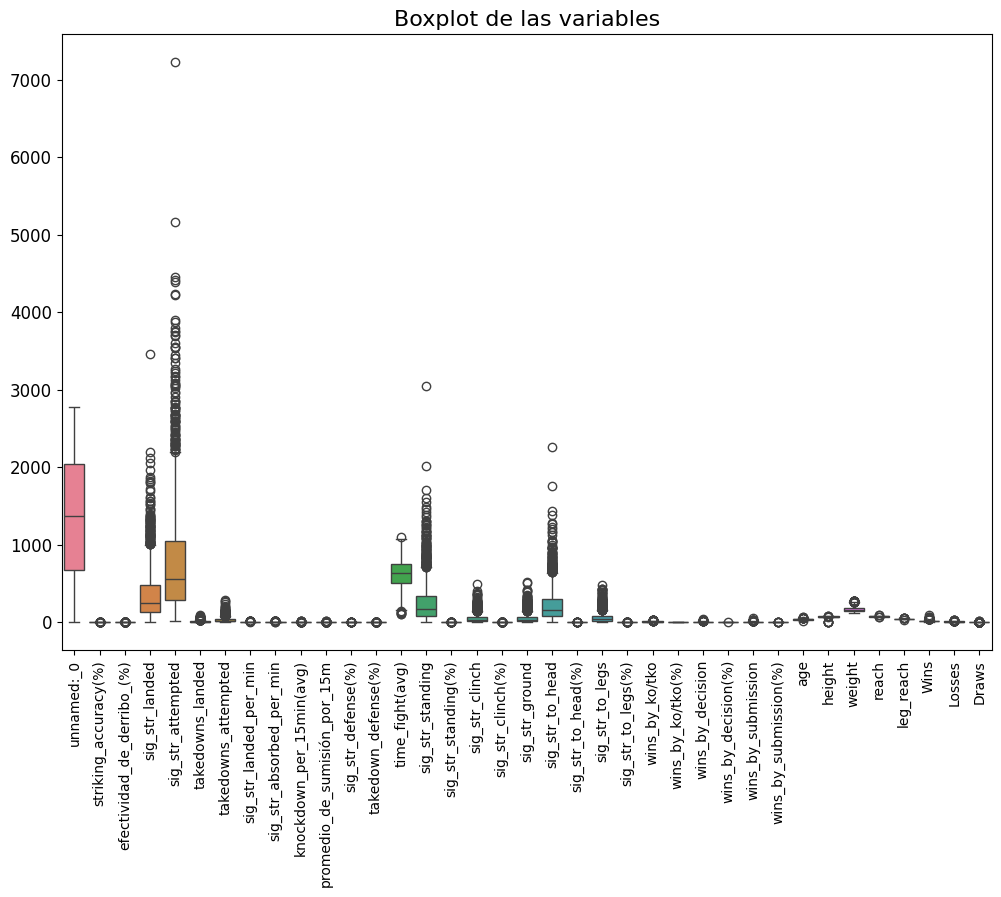

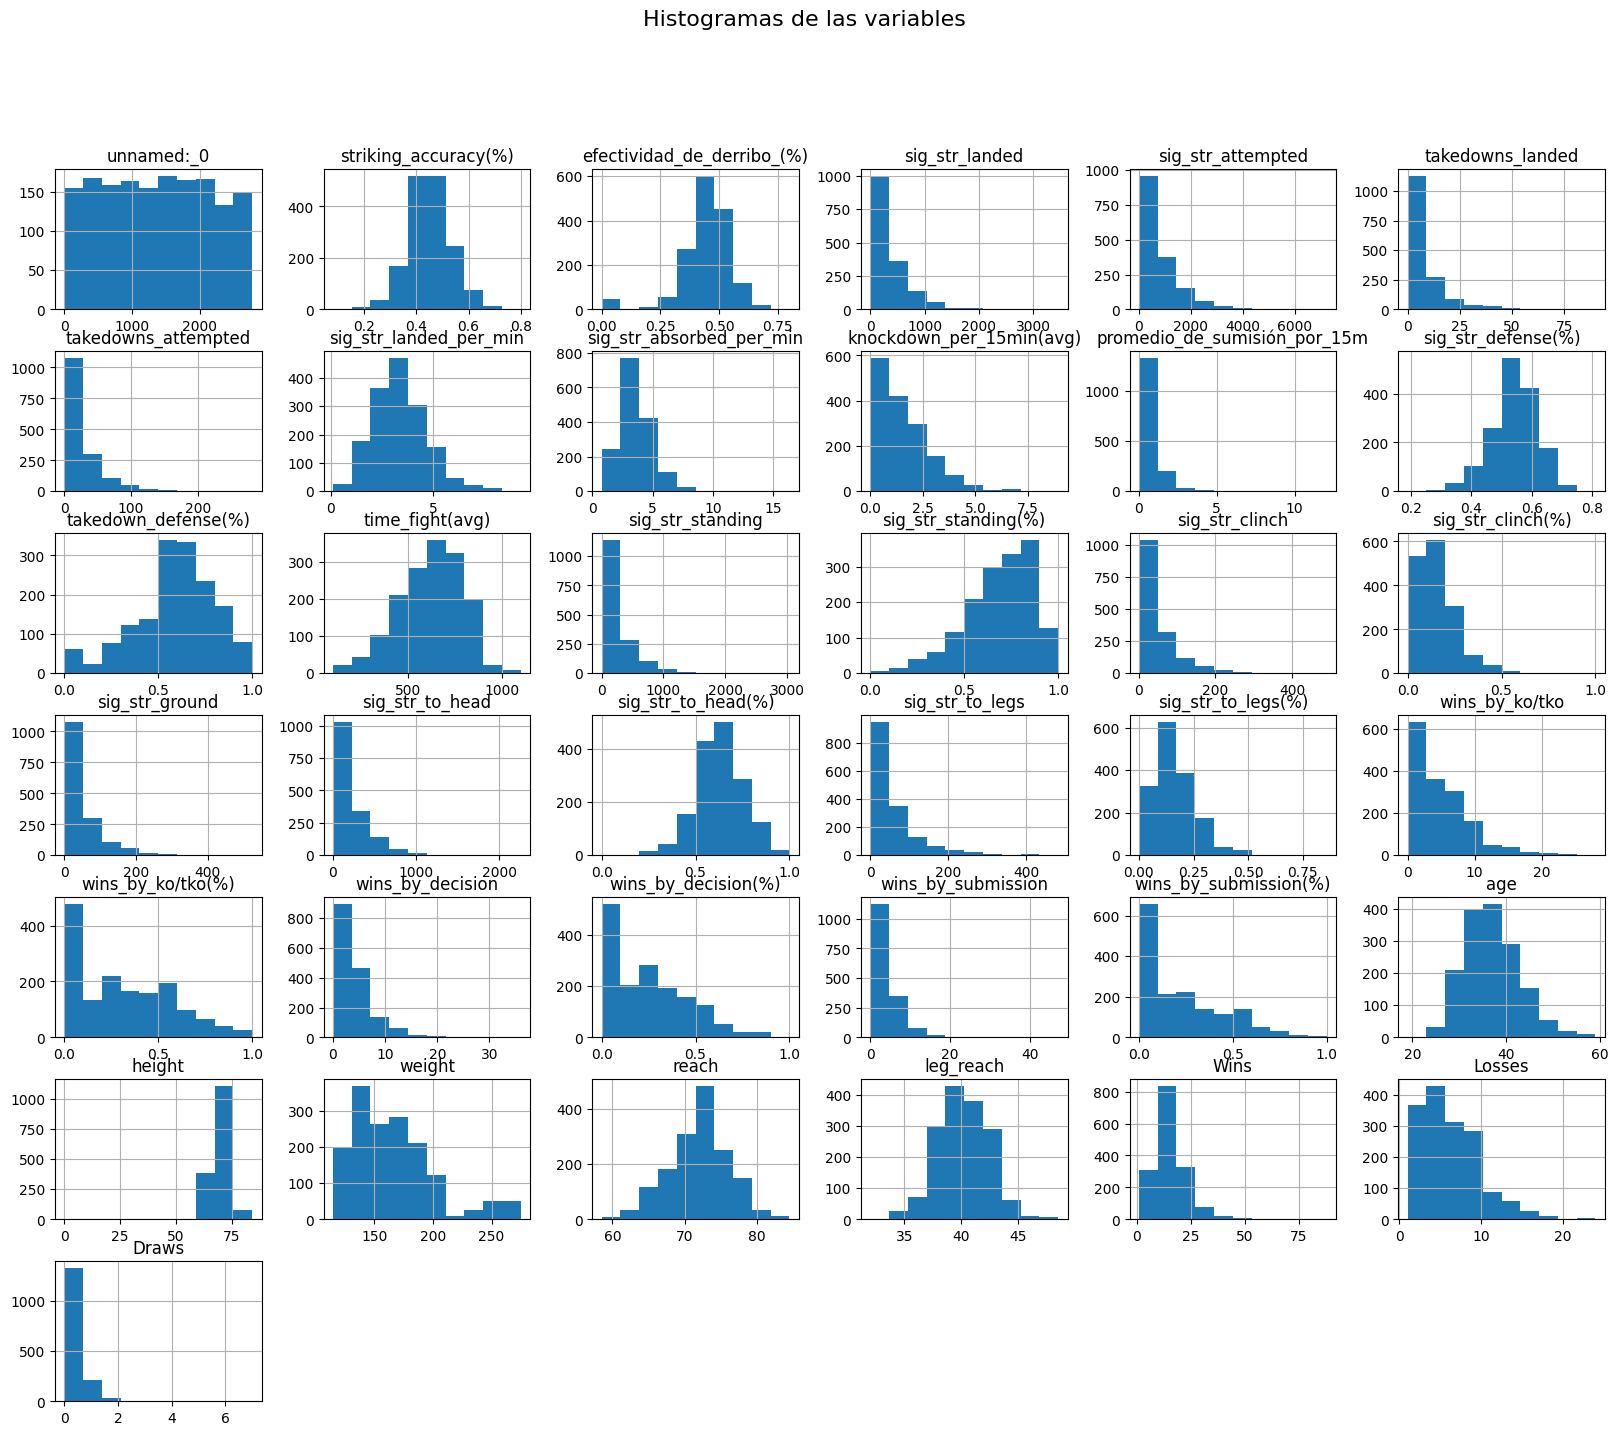

In [312]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aumentar el tamaño de los gráficos
plt.figure(figsize=(12, 8))

# Diagrama de caja (Boxplot)
sns.boxplot(data=df)
plt.title("Boxplot de las variables", fontsize=16)
plt.xticks(rotation=90)  # Rota los nombres de las variables a 90 grados
plt.yticks(fontsize=12)
plt.show()

# Histograma
df.hist(figsize=(20, 16))
plt.suptitle("Histogramas de las variables", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [313]:
#Los peleadores con altura 0 se cambia por la media de la división
df["height"] = df.groupby("division")["height"].transform(lambda x: x.replace(0, x[x > 0].mean()))

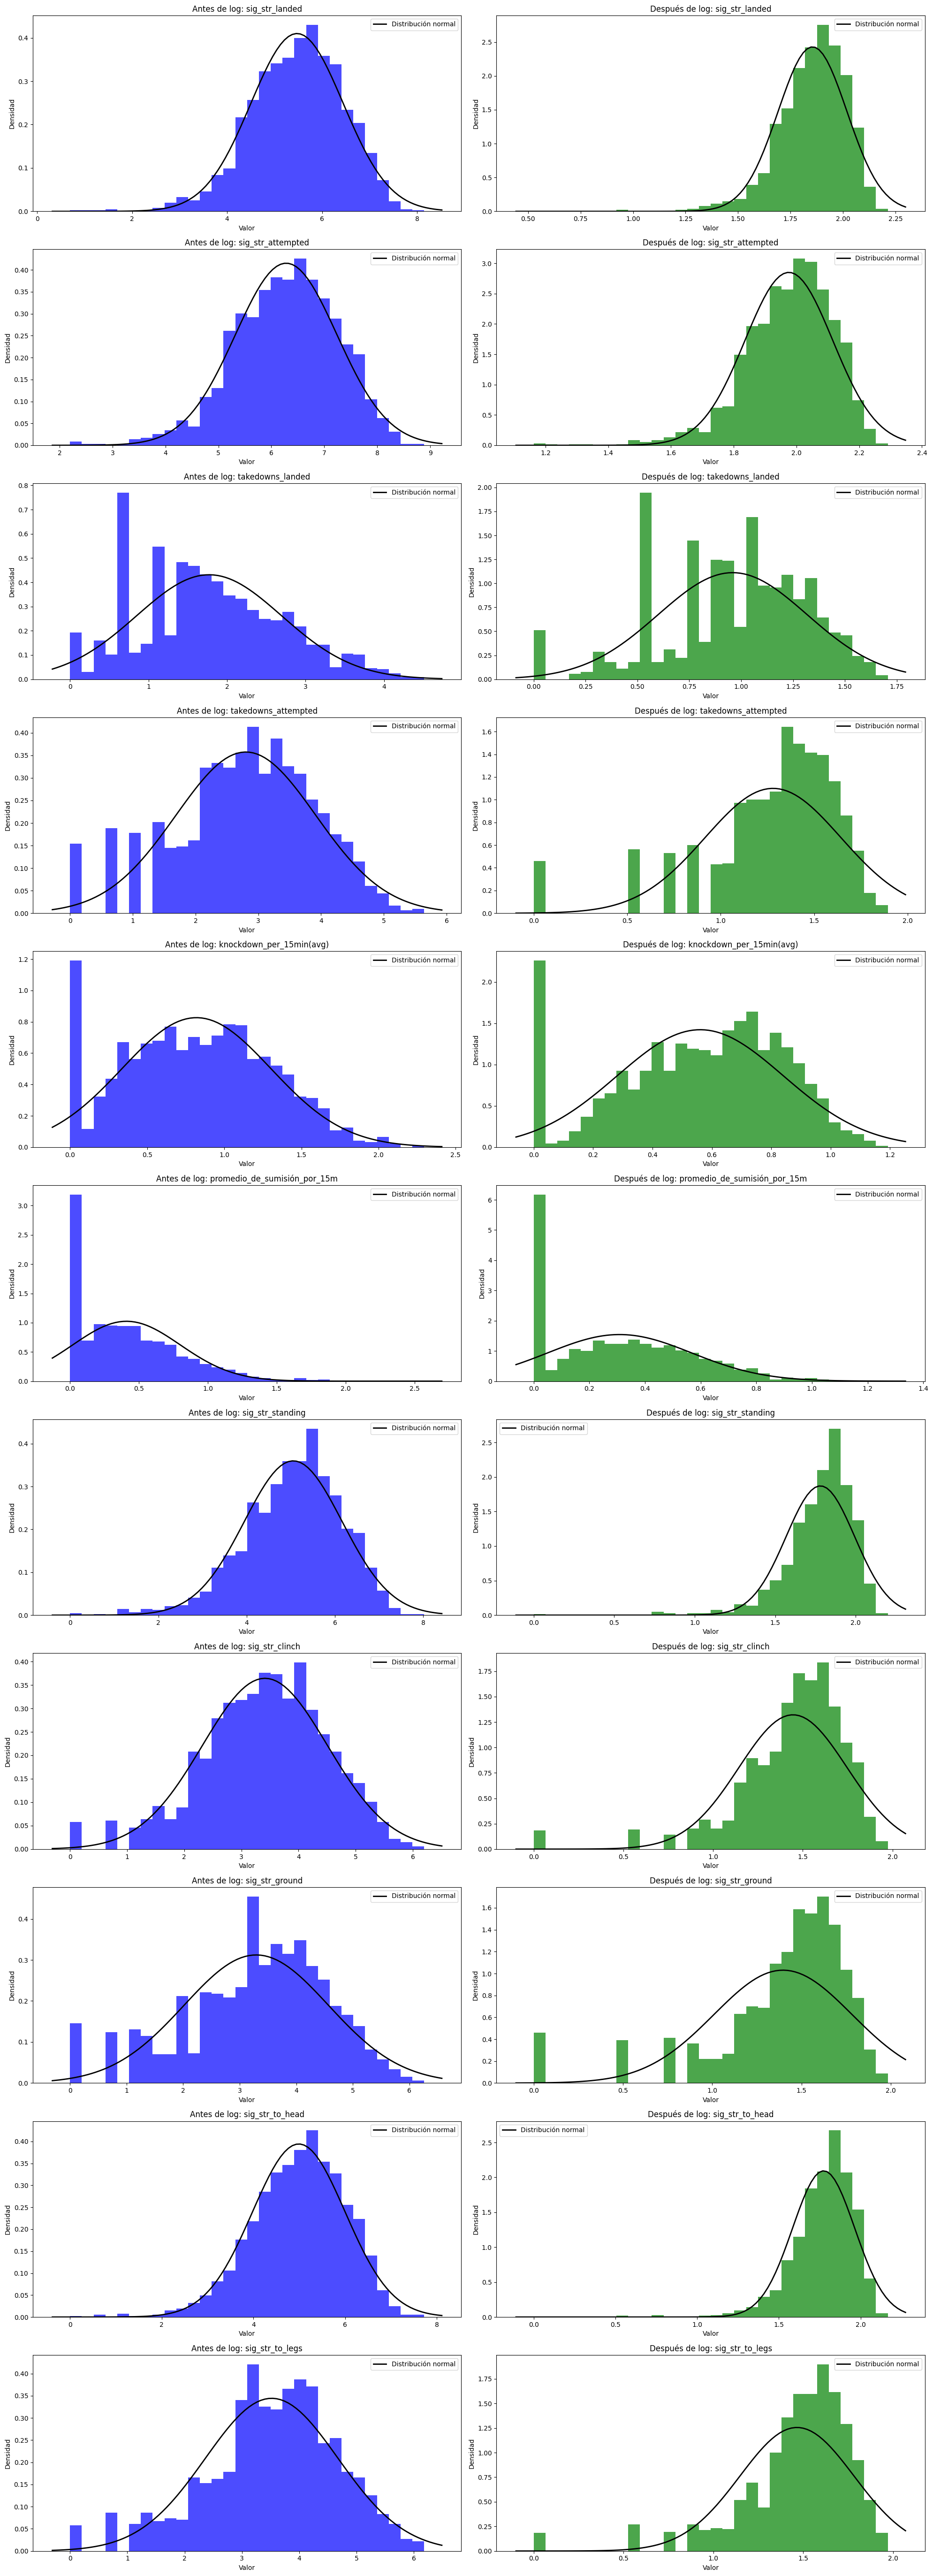

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Supongamos que ya tienes un DataFrame llamado df
# df = pd.read_csv('tu_archivo.csv')  # Cargar tu DataFrame si es necesario

# Lista de columnas a transformar
transf_log = ["sig_str_landed", "sig_str_attempted", "takedowns_landed", 
              "takedowns_attempted", "knockdown_per_15min(avg)", 
              'promedio_de_sumisión_por_15m', 'sig_str_standing', 
              'sig_str_clinch', 'sig_str_ground', 'sig_str_to_head', 
              'sig_str_to_legs']

# Asegurarse de que las columnas existan en el DataFrame
transf_log = [col for col in transf_log if col in df.columns]




# Aplicar la transformación logarítmica a las columnas
for col in transf_log:
    df[col] = np.log1p(df[col])  # Reemplaza la columna original por su logaritmo




# Función para graficar histograma con una distribución normal superpuesta
def plot_hist_with_normal(data, title, color, ax):
    # Histograma
    ax.hist(data.dropna(), bins=30, color=color, alpha=0.7, density=True)
    
    # Ajustar una distribución normal a los datos
    mu, std = np.mean(data), np.std(data)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    
    # Graficar la distribución normal
    ax.plot(x, p, 'k', linewidth=2, label='Distribución normal')
    ax.set_title(title)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Densidad')
    ax.legend()

# Ajustar la altura de la figura
fig_height = max(5 * len(transf_log), 30)  # Ajusta dinámicamente la altura
plt.figure(figsize=(20, fig_height))

for i, col in enumerate(transf_log, 1):
    # Antes de la transformación
    ax1 = plt.subplot(len(transf_log), 2, 2*i-1)
    plot_hist_with_normal(df[col], f'Antes de log: {col}', 'blue', ax1)
    
    # Después de la transformación
    ax2 = plt.subplot(len(transf_log), 2, 2*i)
    df_log_transformed = np.log1p(df[col])  # Aplicar transformación logarítmica
    plot_hist_with_normal(df_log_transformed, f'Después de log: {col}', 'green', ax2)

plt.tight_layout()
plt.show()


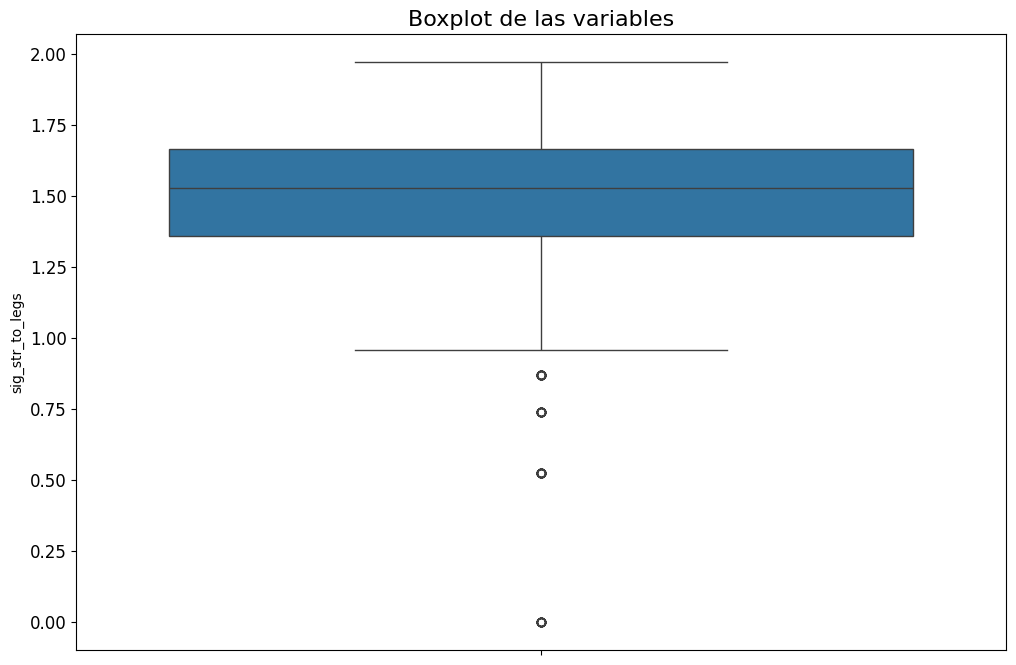

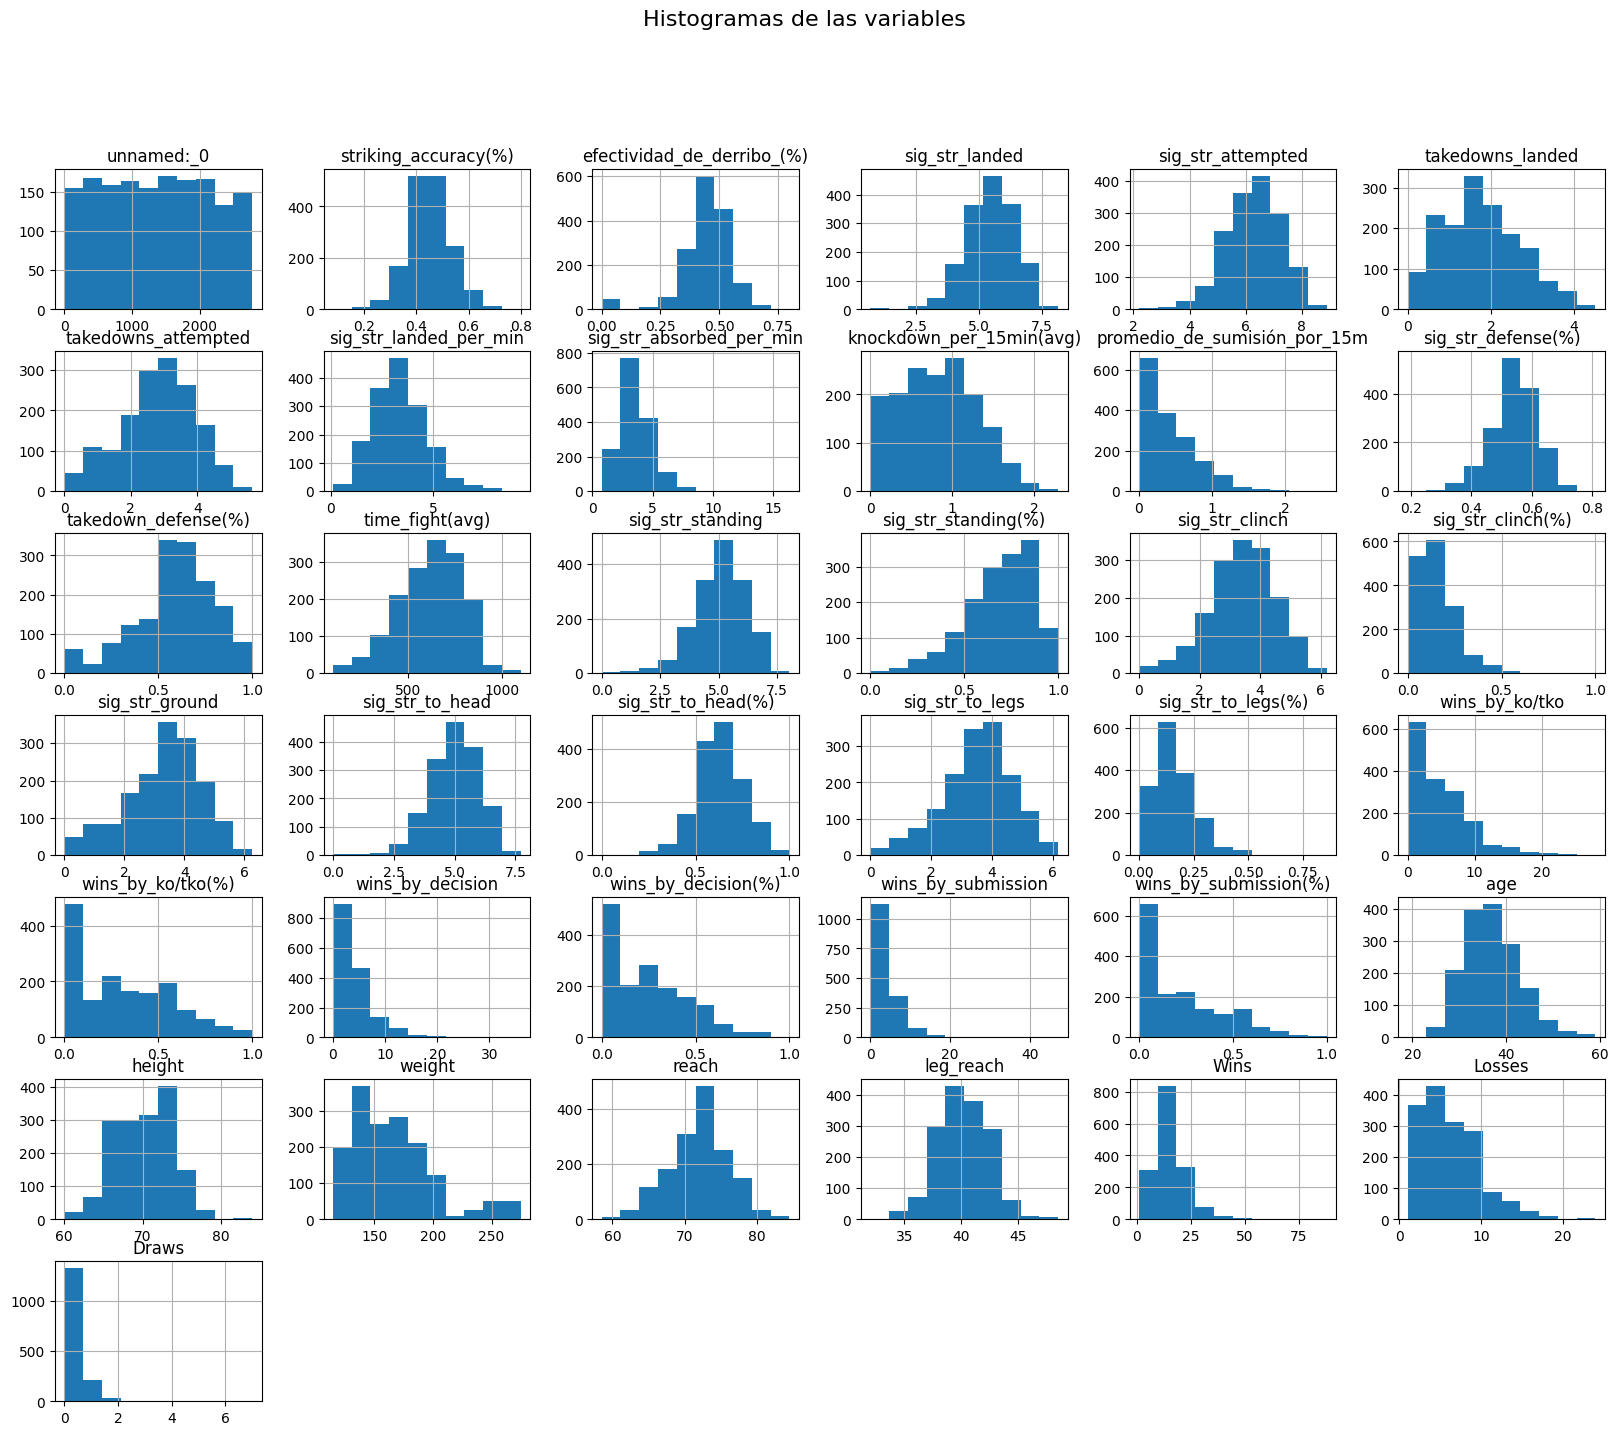

In [315]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aumentar el tamaño de los gráficos
plt.figure(figsize=(12, 8))

# Diagrama de caja (Boxplot)
sns.boxplot(data=df_log_transformed)
plt.title("Boxplot de las variables", fontsize=16)
plt.xticks(rotation=90)  # Rota los nombres de las variables a 90 grados
plt.yticks(fontsize=12)
plt.show()

# Histograma
df.hist(figsize=(20, 16))
plt.suptitle("Histogramas de las variables", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()